# 1. Simple Linear Regression

# Import required packages 

In [3]:
# importing required packages
# data operation libraries

import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

# For regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

Through out the code b represents intercept and  m represents the slope

## Load Datasets

In [ ]:
tv_data = pd.read_csv('../data/tvmarketing.csv')


tv_data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


## Exploring and visualising the data 

In [6]:
# Display information
tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
#for some statistical information about the dataframe.
tv_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [8]:
# Display the first 5 rows
tv_data.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [9]:
# Display the last 2 rows
tv_data.tail(2)

,TV,Sales
198,283.6,25.5
199,232.1,13.4


In [10]:
# Check the shape of the DataFrame (rows, columns)
tv_data.shape

(200, 2)

<Axes: xlabel='TV', ylabel='Sales'>

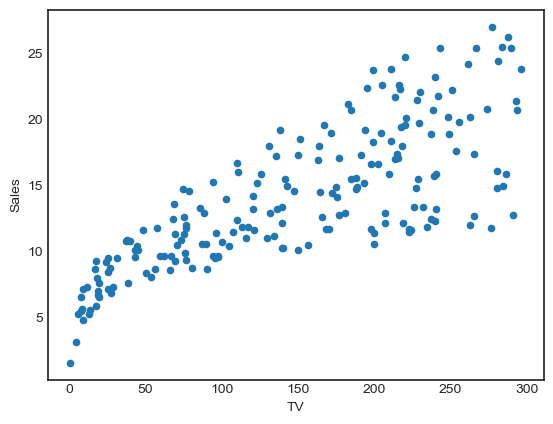

In [11]:
# Visualise the relationship between the features and the response using scatterplots
tv_data.plot(x='TV',y='Sales',kind='scatter')

## Model Building

### 1. Using Scikit learn library builtin function 

In [12]:
# Putting feature variable to X
X_trn1 = tv_data['TV'].values

In [13]:
# Putting response variable to y
y_trn1 = tv_data['Sales'].values

### Splitting Data into Training and Testing Sets 

In [14]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_trn1, y_trn1,  test_size=0.3, random_state = 1)

In [13]:
#X_tests_duplicate=X_tests

In [15]:
print(X_trains.shape)
print(y_trains.shape)
print(X_tests.shape)
print(y_tests.shape)

(140,)
(140,)
(60,)
(60,)


In [16]:
print(type(X_trains))
print(type(X_tests))
print(type(y_trains))
print(type(y_tests))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
X_trains=X_trains.reshape(X_trains.shape[0], 1)
X_tests=X_tests.reshape(X_tests.shape[0], 1)

In [18]:
print(X_trains.shape)
print(y_trains.shape)
print(X_tests.shape)
print(y_tests.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [20]:
print(type(X_trains))
print(type(X_tests))
print(type(y_trains))
print(type(y_tests))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_trains, y_trains)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Coefficient calculation 

In [23]:
# Print the intercept and coefficients
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 6.923519536059554
Slope [0.04812204]


### prediction 

In [24]:
# Making predictions on the testing set
y_pred = lr.predict(X_tests)

In [26]:
X_tests

array([[210.8],
       [202.5],
       [ 95.7],
       [280.2],
       [253.8],
       [283.6],
       [163.3],
       [180.8],
       [ 70.6],
       [215.4],
       [164.5],
       [ 69.2],
       [214.7],
       [109.8],
       [225.8],
       [125.7],
       [131.7],
       [290.7],
       [ 25.6],
       [210.7],
       [100.4],
       [ 67.8],
       [ 25.1],
       [107.4],
       [112.9],
       [188.4],
       [ 43.1],
       [248.8],
       [166.8],
       [240.1],
       [239.9],
       [234.5],
       [149.7],
       [170.2],
       [248.4],
       [184.9],
       [222.4],
       [129.4],
       [216.8],
       [ 19.6],
       [ 13.1],
       [ 90.4],
       [ 18.7],
       [204.1],
       [  7.3],
       [147.3],
       [ 78.2],
       [228. ],
       [205. ],
       [229.5],
       [289.7],
       [123.1],
       [ 19.4],
       [182.6],
       [265.6],
       [165.6],
       [218.5],
       [ 25. ],
       [232.1],
       [ 43. ]])

In [27]:
y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

Text(0, 0.5, 'Sales')

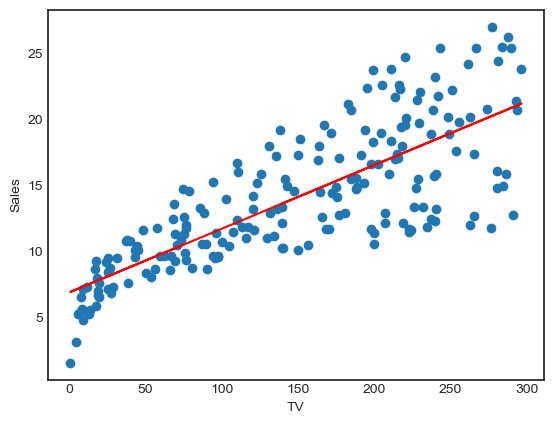

In [28]:
plt.scatter(tv_data['TV'],tv_data['Sales'])
plt.plot(X_trains,lr.predict(X_trains),color='red')
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

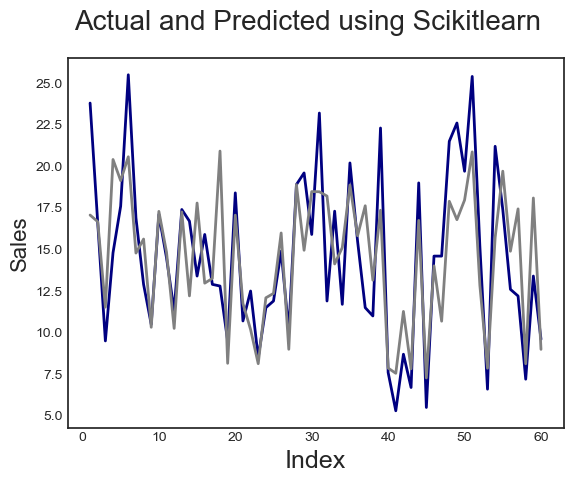

In [29]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_tests, color="navy", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="grey",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted using Scikitlearn', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

Text(0, 0.5, 'ytest-ypred')

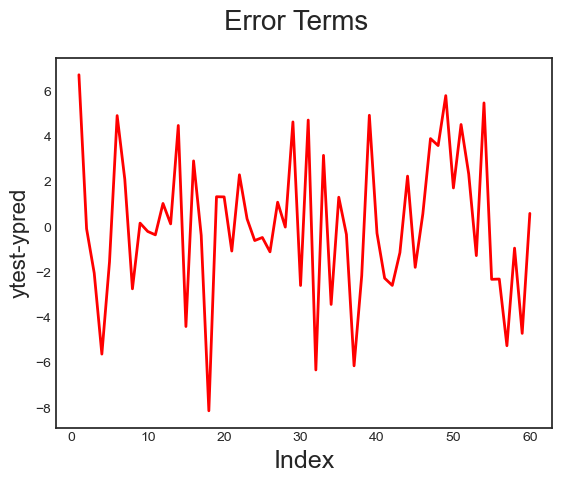

In [31]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_tests-y_pred, color="red", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_tests, y_pred)
r_squared = r2_score(y_tests, y_pred)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 10.571057434656955
r_square_value : 0.575061860494331


## Visualizing the coefficients 

In [34]:
X=X_trains 
y=y_trains

In [35]:
# Create grid coordinates for plotting
#1D 50 equally spaced values
b = np.linspace(lr.intercept_-2, lr.intercept_+2, 50)
m = np.linspace(lr.coef_-0.02, lr.coef_+0.02, 50)
#to create a grid of coordinate pairs that cover the range of values for the intercept and slope
#rows-b, col-m
xx, yy = np.meshgrid(b, m, indexing='xy')
Z = np.zeros((b.size,m.size))

# Calculate Z-values (RSS) based on grid of coefficients
#actual -predicted , (y-(b+mx))
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()

# Minimized RSS
min_RSS = r'b, m for minimized RSS'
min_rss = np.sum((lr.intercept_+lr.coef_*X - y.reshape(-1,1))**2)
min_rss

np.float64(1468.8755634091917)

this code adds a scatter plot to a 3D surface plot created with plot_surface(), where the scatter plot represents the minimum residual sum of squares value for a linear regression model. 

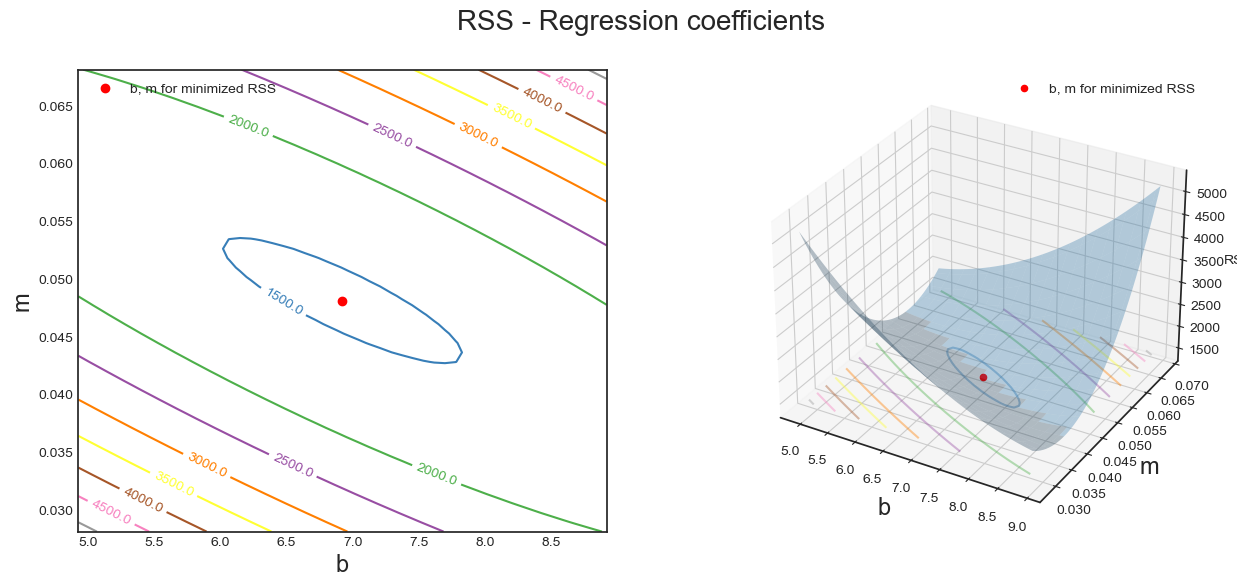

In [36]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
#contour plot on the first subplot (ax1) with x-coordinates xx,
#y-coordinates yy and RSS values Z, using the colormap plt.cm.Set1.
#inline=True: Specifies that the contour labels should be placed inside the contour lines.
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(lr.intercept_, lr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
#surface plot on the second subplot (ax2) with x-coordinates xx, 
#y-coordinates yy and RSS values Z, using the colormap plt.cm.Set1.
#rstride- An integer value specifying the stride used to sample the rows of Z.
#cstride-  An integer value specifying the stride used to sample the columns of Z
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4)
ax2.scatter3D(lr.intercept_, lr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
#ax2.set_zlim(Z.min(),Z.max())
#ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'b', fontsize=17)
    ax.set_ylabel(r'm', fontsize=17)
   # ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [41]:
# Test the model
# suppose you want to predict the sales value for the tv budget =1200,
test_input =[[1200]]
print(f'Predicted sales for advertising expenses of $1200: {lr.predict(test_input)}')


Predicted sales for advertising expenses of $1200: [64.66996949]


## Using statsmodels package

In [42]:
import statsmodels.formula.api as smf
est1 = smf.ols('Sales ~ TV', tv_data).fit()   #sales is modeled as a function of TV
est1.summary().tables[1]
#est1.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [43]:
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        14:43:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating t-value, p-value

In [44]:
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression

# Example data
x = X_trn1.reshape(-1, 1)  # Reshape to column vector
y = y_trn1

# Step 1: Fit linear regression model
model = LinearRegression().fit(x, y)

# Step 2: Extract coefficients
intercept = model.intercept_
coefficients = model.coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  7.032593549127693
Coefficients =  [0.04753664]


In [45]:
# Step 3: Calculate residuals
y_pred = model.predict(x)
residuals = y - y_pred
print(residuals)

[ 4.12922549  1.25202595  1.44977624  4.26560543 -2.72721814 -0.24616232
  2.03404963  0.45350227 -2.64140866 -5.93041431 -1.57476548  0.16128975
  1.03603441 -1.96741599  2.26517814  6.07874691  2.24442223  3.99059583
  0.97787093  0.56525932  0.58540418 -5.81779199 -2.0600772  -2.38520856
 -0.29412625 -7.52997632  1.17442053 -2.54614092  0.04029031  0.11131964
  0.44392447 -0.49948025 -2.053155   -2.25832525 -2.08185004 -8.05149492
  5.67987712  4.11641941  1.01857725  3.62905243 -0.05876324  1.65342109
 -0.28935118 -3.96792445  0.27423678 -0.45625929 -0.6966302   4.76336641
 -3.03291826 -0.51279479 -5.13041431 -1.10527225  5.28047746  5.48721591
  0.67953101  7.21236867 -1.87961102 -0.30708398  6.74668265  1.35143631
 -1.47580381  4.74608231 -2.7081116   2.08539348  4.73535289 -1.01262174
  0.97000228 -0.25444756  0.58220801  4.9614628   1.80286134  0.14788333
  0.49342449 -2.18383482 -0.17691262  0.86403723 -1.43985116  1.43924128
 -1.98929141 -1.54684384  1.13560712 -6.13187992  0

In [46]:
# Step 4: Calculate degrees of freedom
n = len(x)
print("n= ",n)
k = x.shape[1]  # number of predictors
print("No of predictors = ",k)
df_residual = n - k - 1
print("df_residual = ",df_residual)

n=  200
No of predictors =  1
df_residual =  198


In [47]:
# Step 5: Calculate residual variance
sigma = np.sum(residuals ** 2) / df_residual
print('sigma= ',sigma)


sigma=  10.618841328946218


In [48]:
X

array([[139.2],
       [139.3],
       [  5.4],
       [293.6],
       [281.4],
       [  8.7],
       [ 80.2],
       [137.9],
       [227.2],
       [ 31.5],
       [262.7],
       [213.5],
       [287.6],
       [ 11.7],
       [ 17.9],
       [209.6],
       [ 23.8],
       [ 76.4],
       [250.9],
       [141.3],
       [187.8],
       [134.3],
       [239.8],
       [224. ],
       [ 75.5],
       [ 97.5],
       [ 75.3],
       [  8.4],
       [191.1],
       [175.1],
       [135.2],
       [266.9],
       [ 85.7],
       [139.5],
       [171.3],
       [187.9],
       [ 38.2],
       [177. ],
       [ 38. ],
       [168.4],
       [ 16.9],
       [237.4],
       [ 28.6],
       [197.6],
       [ 17.2],
       [199.1],
       [193.2],
       [280.7],
       [ 57.5],
       [175.7],
       [230.1],
       [  4.1],
       [120.5],
       [ 69. ],
       [198.9],
       [206.8],
       [ 88.3],
       [  0.7],
       [ 89.7],
       [239.3],
       [213.4],
       [217.7],
       [

In [50]:
X.T   #Transpose of a matrix

array([[139.2, 139.3,   5.4, 293.6, 281.4,   8.7,  80.2, 137.9, 227.2,
         31.5, 262.7, 213.5, 287.6,  11.7,  17.9, 209.6,  23.8,  76.4,
        250.9, 141.3, 187.8, 134.3, 239.8, 224. ,  75.5,  97.5,  75.3,
          8.4, 191.1, 175.1, 135.2, 266.9,  85.7, 139.5, 171.3, 187.9,
         38.2, 177. ,  38. , 168.4,  16.9, 237.4,  28.6, 197.6,  17.2,
        199.1, 193.2, 280.7,  57.5, 175.7, 230.1,   4.1, 120.5,  69. ,
        198.9, 206.8,  88.3,   0.7,  89.7, 239.3, 213.4, 217.7, 243.2,
        172.5, 104.6, 110.7, 156.6, 140.3, 117.2,  66.1,  97.2,  68.4,
         56.2, 222.4,  87.2, 228.3,   7.8, 199.8,  50. , 238.2, 121. ,
         48.3, 241.7, 286. , 131.1, 195.4, 177. , 163.5, 255.4,  76.4,
        216.4, 142.9,  27.5, 206.9,  62.3, 151.5, 284.3,  66.9,  44.7,
        265.2,  39.5, 292.9,  18.8,  75.1, 276.9,   8.6,  53.5, 220.3,
         44.5, 136.2,  13.2, 261.3, 102.7, 120.2,  94.2, 193.7,  76.3,
        197.6, 237.4, 199.8, 220.5, 149.8,  93.9, 184.9, 240.1, 296.4,
      

The variance-covariance matrix contains the variances of each coefficient on the diagonal and the covariances between coefficients off-diagonal. Scaling by the MSE adjusts the values to represent the variances and covariances in the regression model.

In [51]:
# Get the variance-covariance matrix of the coefficients
# Create the design matrix X by horizontally stacking a column of ones (for the intercept) and the feature vector x
X = np.hstack([np.ones((len(x), 1)), x])
print("X",X)

# Compute the inverse of the matrix X^T * X
XTX_inv = np.linalg.inv(np.dot(X.T, X))
print("XTranspose x inverse",XTX_inv)
print("shape of the matrix: ", XTX_inv.shape)


# Scale the inverse matrix by the residual variance  to get the variance-covariance matrix of the coefficients
var_cov_matrix = sigma * XTX_inv
print("Variance Covariance Matrix")
print(var_cov_matrix)

X [[  1.  230.1]
 [  1.   44.5]
 [  1.   17.2]
 [  1.  151.5]
 [  1.  180.8]
 [  1.    8.7]
 [  1.   57.5]
 [  1.  120.2]
 [  1.    8.6]
 [  1.  199.8]
 [  1.   66.1]
 [  1.  214.7]
 [  1.   23.8]
 [  1.   97.5]
 [  1.  204.1]
 [  1.  195.4]
 [  1.   67.8]
 [  1.  281.4]
 [  1.   69.2]
 [  1.  147.3]
 [  1.  218.4]
 [  1.  237.4]
 [  1.   13.2]
 [  1.  228.3]
 [  1.   62.3]
 [  1.  262.9]
 [  1.  142.9]
 [  1.  240.1]
 [  1.  248.8]
 [  1.   70.6]
 [  1.  292.9]
 [  1.  112.9]
 [  1.   97.2]
 [  1.  265.6]
 [  1.   95.7]
 [  1.  290.7]
 [  1.  266.9]
 [  1.   74.7]
 [  1.   43.1]
 [  1.  228. ]
 [  1.  202.5]
 [  1.  177. ]
 [  1.  293.6]
 [  1.  206.9]
 [  1.   25.1]
 [  1.  175.1]
 [  1.   89.7]
 [  1.  239.9]
 [  1.  227.2]
 [  1.   66.9]
 [  1.  199.8]
 [  1.  100.4]
 [  1.  216.4]
 [  1.  182.6]
 [  1.  262.7]
 [  1.  198.9]
 [  1.    7.3]
 [  1.  136.2]
 [  1.  210.8]
 [  1.  210.7]
 [  1.   53.5]
 [  1.  261.3]
 [  1.  239.3]
 [  1.  102.7]
 [  1.  131.1]
 [  1.   69. ]
 [  1.  

In [39]:
# Extract standard error of the intercept (first diagonal element)
SE_intercept = np.sqrt(var_cov_matrix[0, 0])

print("Standard error of the intercept:", SE_intercept)

# Calculate estimated value of the intercept
intercept = model.intercept_

# Calculate t-value for the intercept
t_value_intercept = intercept / SE_intercept

print("t-value for the intercept:", t_value_intercept)

from scipy.stats import t

# Calculate degrees of freedom
df = n - k - 1  # Same as df_residual

# Calculate p-value for the intercept
p_value_intercept = 2 * (1 - t.cdf(np.abs(t_value_intercept), df))

print("p-value for the intercept:", p_value_intercept)

Standard error of the intercept: 0.45784294027347827
t-value for the intercept: 15.36027517411755
p-value for the intercept: 0.0


In [40]:
# Calculate standard error for the coefficient
SE_coefficient = np.sqrt(var_cov_matrix[1, 1])  # Extract standard error of coefficient (second diagonal element)

print("Standard error for the coefficient:", SE_coefficient)

# Calculate t-value for the coefficient
coefficient = model.coef_[0]  # Extract coefficient
t_value_coefficient = coefficient / SE_coefficient

print("t-value for the coefficient:", t_value_coefficient)

# Calculate p-value for the coefficient
p_value_coefficient = 2 * (1 - t.cdf(np.abs(t_value_coefficient), df))

print("p-value for the coefficient:", p_value_coefficient)


Standard error for the coefficient: 0.002690607187796869
t-value for the coefficient: 17.667625600875564
p-value for the coefficient: 0.0
